## Heart Disease Prediction 

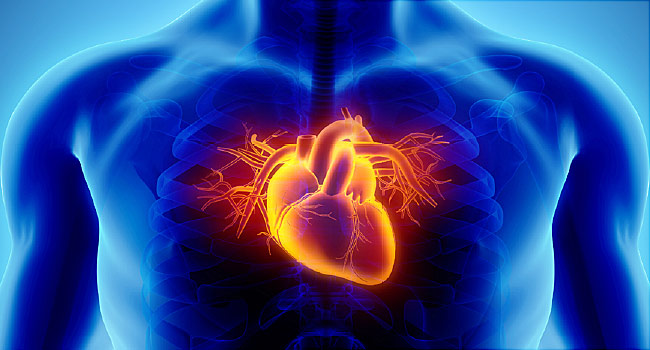

## Business Problem

Data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Problem Statement

 By using this data we need to predict whether the patient is suffering from Heart Disease or not.

## Data Description

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Business Objectives and contraints

1. The cost of misclassification can be very high
2. Latency concerns are no issue

## Importing Libraries

In [161]:
## Plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [162]:
## Metrics for classifcation 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
## For scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV


In [163]:
!pip install xgboost
!pip install catboost


In [164]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [166]:
df = pd.read_csv("heart.csv")

In [167]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Exploratory Data Analysis

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [169]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [170]:
df.shape

(303, 14)

In [171]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## we have no missing values in any of the 14 features

## Lets now check correlation between various features

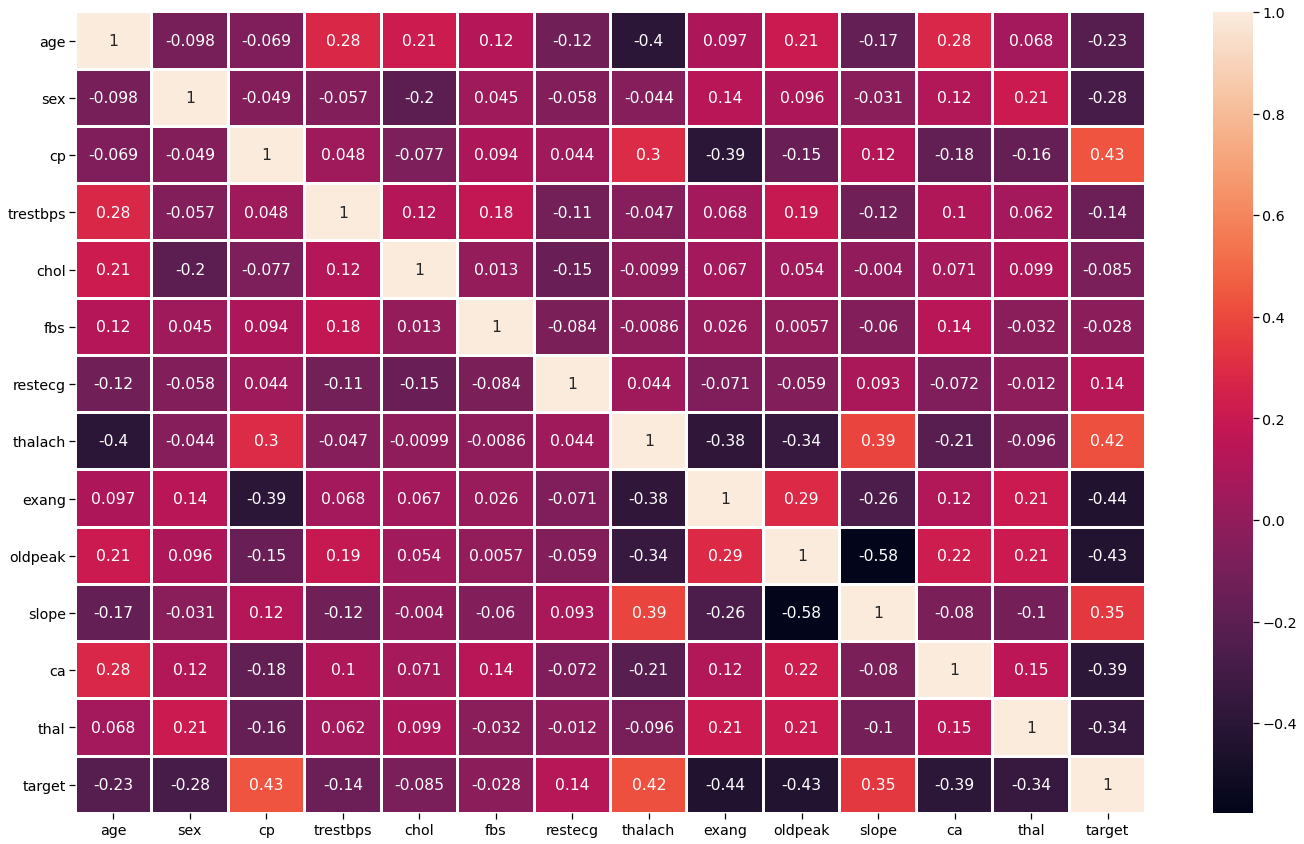

In [172]:
plt.figure(figsize = (20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth=2)
plt.tight_layout()

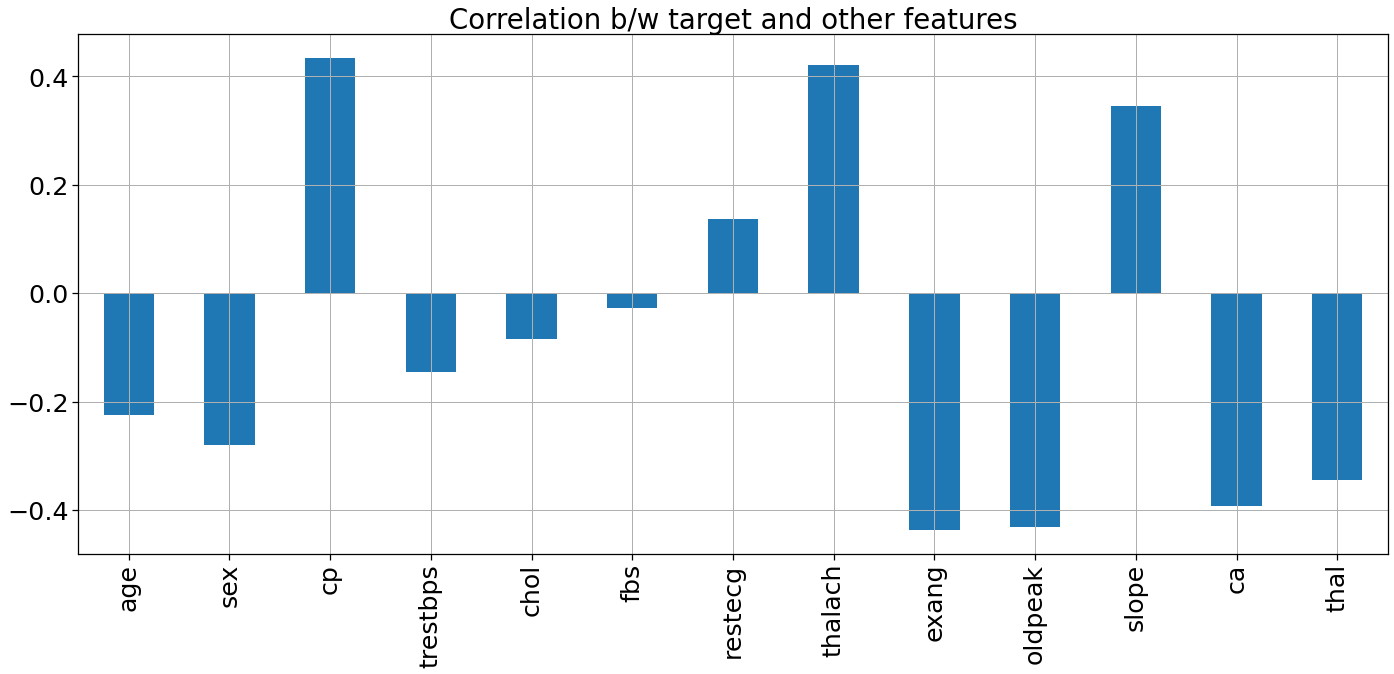

In [173]:
##plotting correlation of various features wrt target column
sns.set_context('notebook',font_scale=2.3)
df_drop = df.drop('target',axis=1)
df_corr = df_drop.corrwith(df.target)
df_corr.plot(kind = "bar",grid = True,figsize = (20,10),title = "Correlation b/w target and other features")
plt.tight_layout()

Four features ("cp","restecg","thalach","slope") are positively correlated with target and others are negatively correlated

# Individual feature analysis

## Age analysis

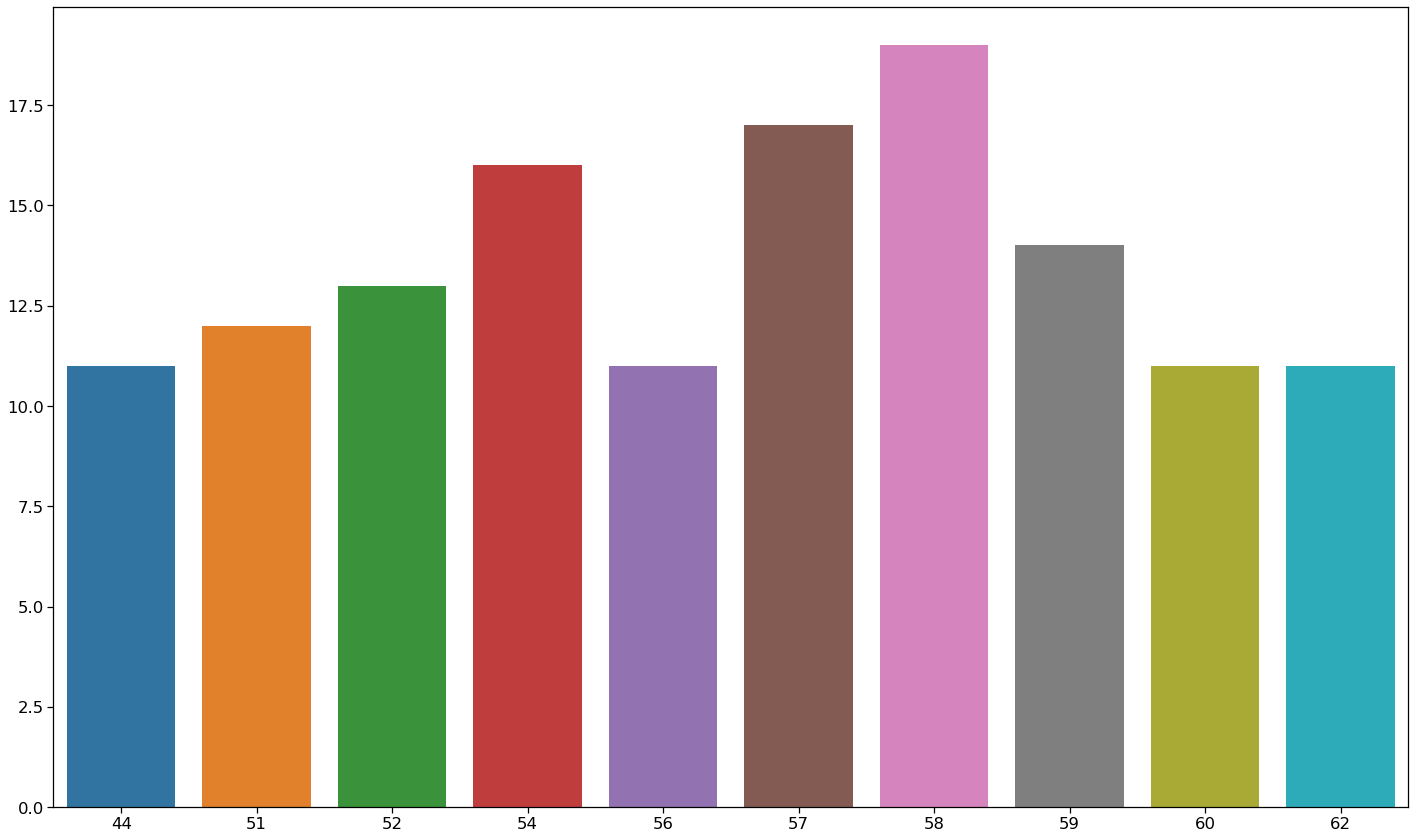

In [174]:
plt.figure(figsize = (20,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x = df.age.value_counts()[:10].index,y = df.age.value_counts()[:10].values)
plt.tight_layout()

In [175]:
##checkingg the range of age
Minage = min(df.age)
Maxage = max(df.age)
Meanage = df.age.mean()
print("Minage: ",Minage)
print("Maxage: ",Maxage)
print("Meanage: ",Meanage)

Minage:  29
Maxage:  77
Meanage:  54.366336633663366


### we will now divide the age into three sets : "Young" , "Middle Aged", "Elderly"

In [176]:
Young = df[(df.age>=29) & (df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Old = df[(df.age>=55)]

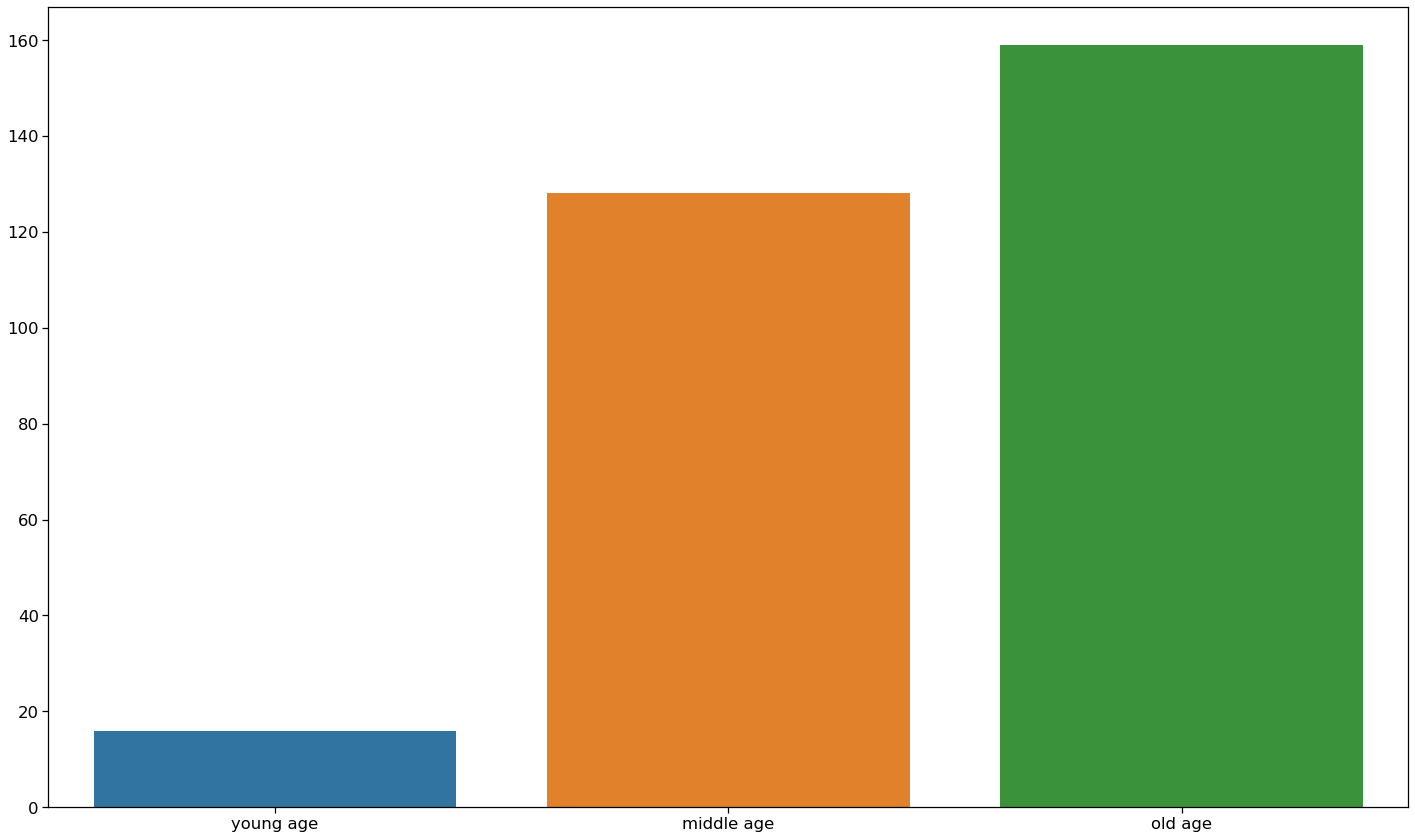

In [177]:
plt.figure(figsize = (20,12))
sns.set_context('notebook',font_scale =1.5)
sns.barplot(x= ["young age","middle age","old age"],y = [len(Young),len(Middle),len(Old)])
plt.tight_layout()

### Elderly are more likely to suffer from heart disease

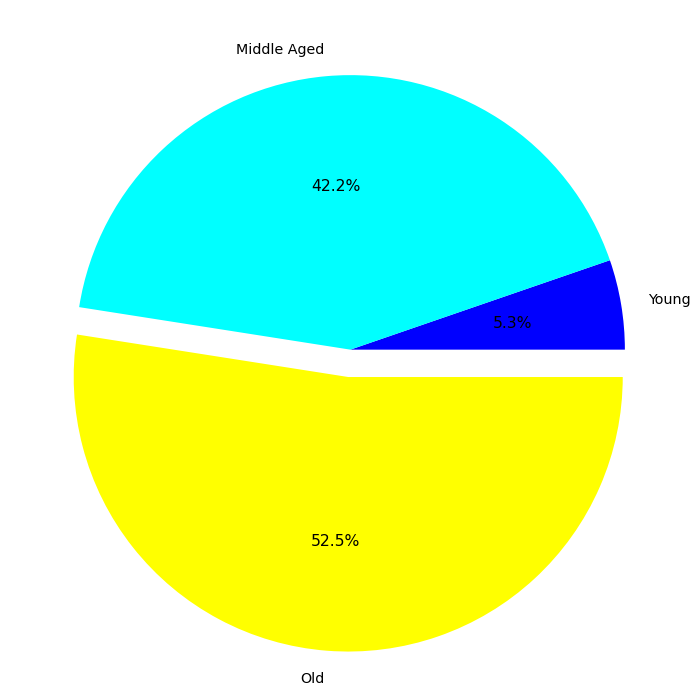

In [178]:
colors = ["Blue","Cyan","Yellow"]
explode = [0,0,0.1]
plt.figure (figsize = (10,10))
sns.set_context('notebook',font_scale = 1.3)
plt.pie([len(Young),len(Middle),len(Old)],labels = ["Young","Middle Aged","Old"],explode = explode,colors =colors,autopct = '%1.1f%%')
plt.tight_layout()


## Sex feature Analysis

/Users/vanshikathakur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


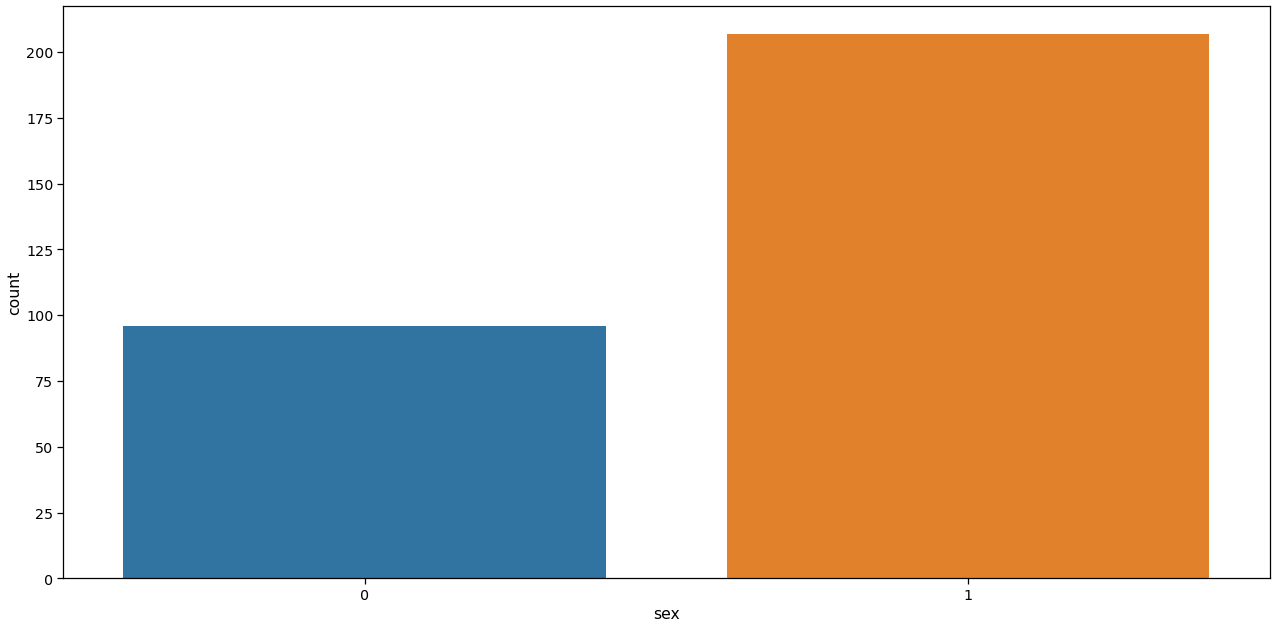

In [179]:
plt.figure(figsize= (18,9))
sns.set_context('notebook',font_scale = 1.3)
sns.countplot(df['sex'])
plt.tight_layout()

### Ratio b/w male and female is approx 2:1

/Users/vanshikathakur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

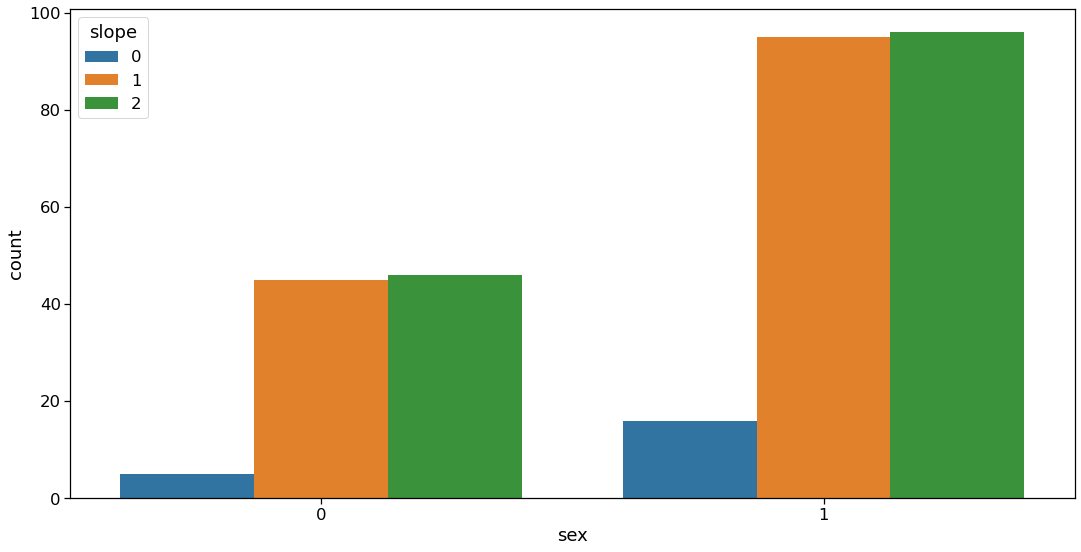

In [180]:
plt.figure(figsize = (18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['sex'],hue=df['slope'])

/Users/vanshikathakur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

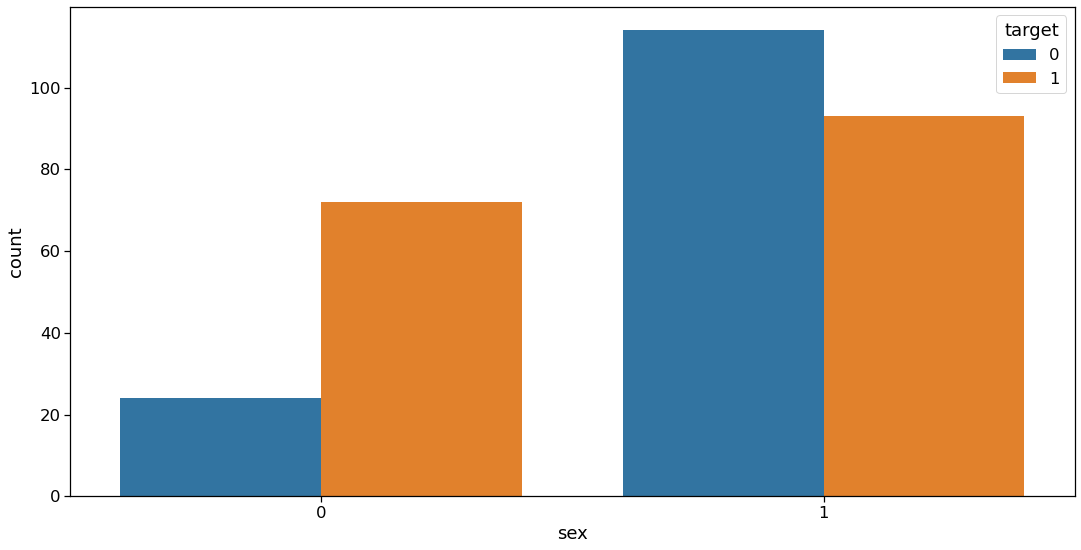

In [181]:
# Let's plot the relation between sex and target.
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale =1.5)
sns.countplot(df['sex'],hue=df['target'])

### Males are more likely to be diagnosed with heart disease than females,(0=females,1=males)

## Chest pain type("cp") analysis

/Users/vanshikathakur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


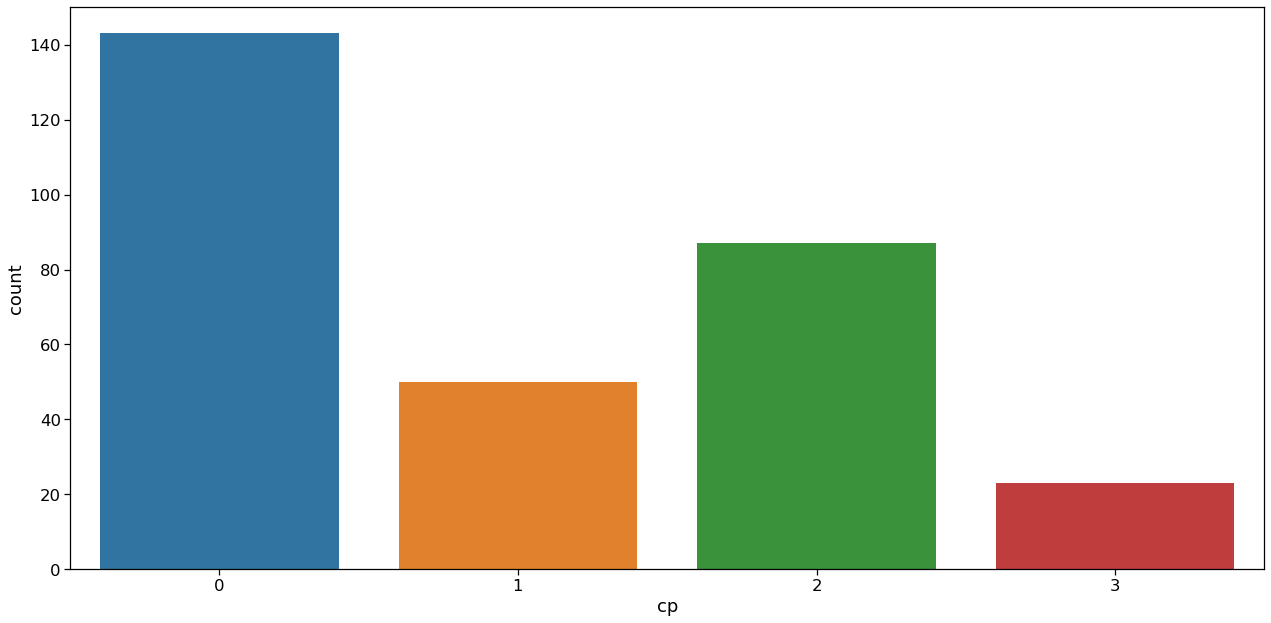

In [182]:
plt.figure(figsize = (18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['cp'])
plt.tight_layout()

### As seen, there are 4 types of chest pain

1. status at least

2. condition slightly distressed

3. condition medium problem

4. condition too bad

/Users/vanshikathakur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

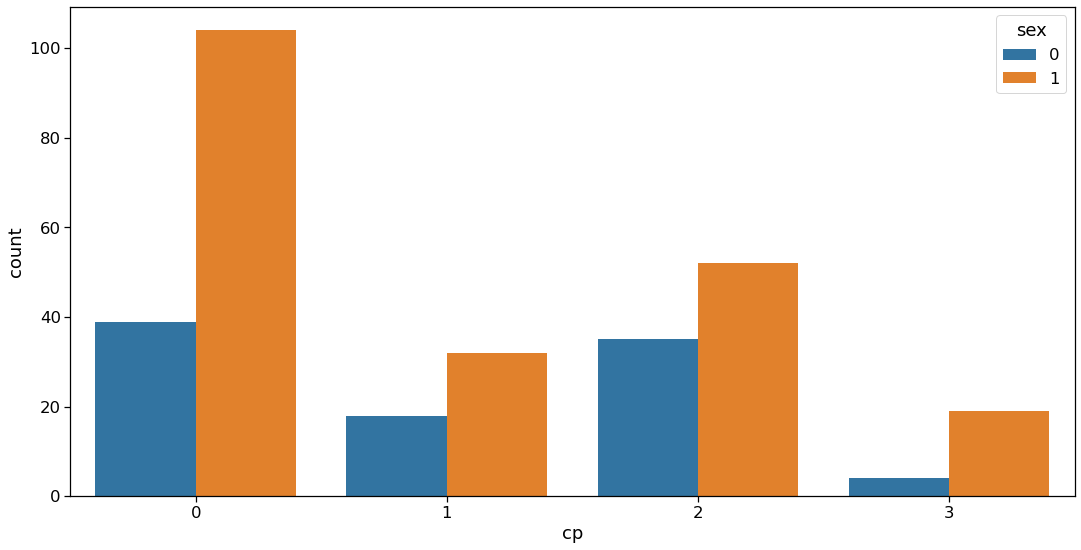

In [183]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale= 1.5)
sns.countplot(df['cp'],hue= df['sex'])

/Users/vanshikathakur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

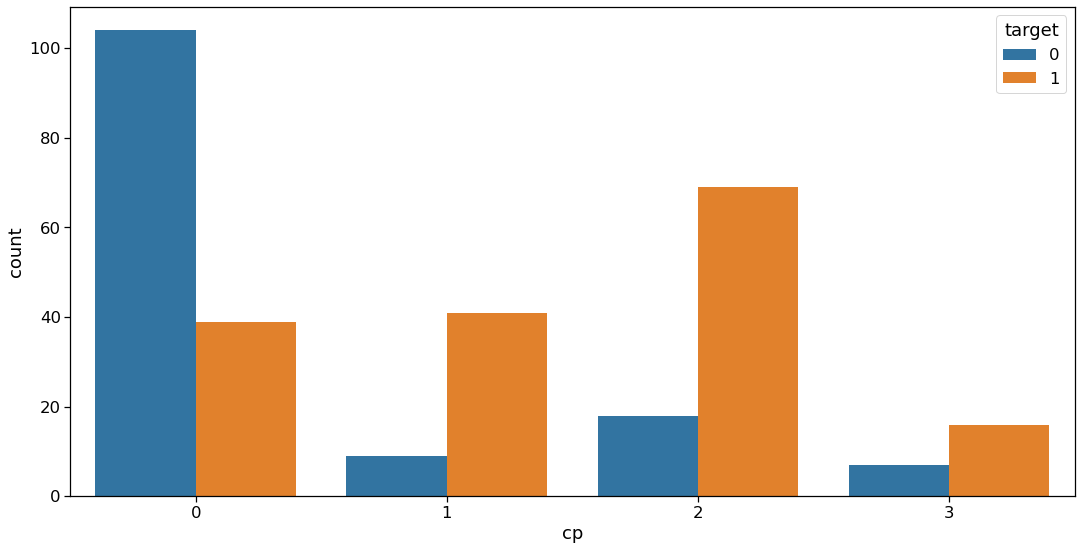

In [184]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale= 1.5)
sns.countplot(df['cp'],hue= df['target'])

## As the severity of chest pain is increased so is the chances of having the heart disease and elderly have high chances of severe chest pain.

# Thal Analysis

/Users/vanshikathakur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


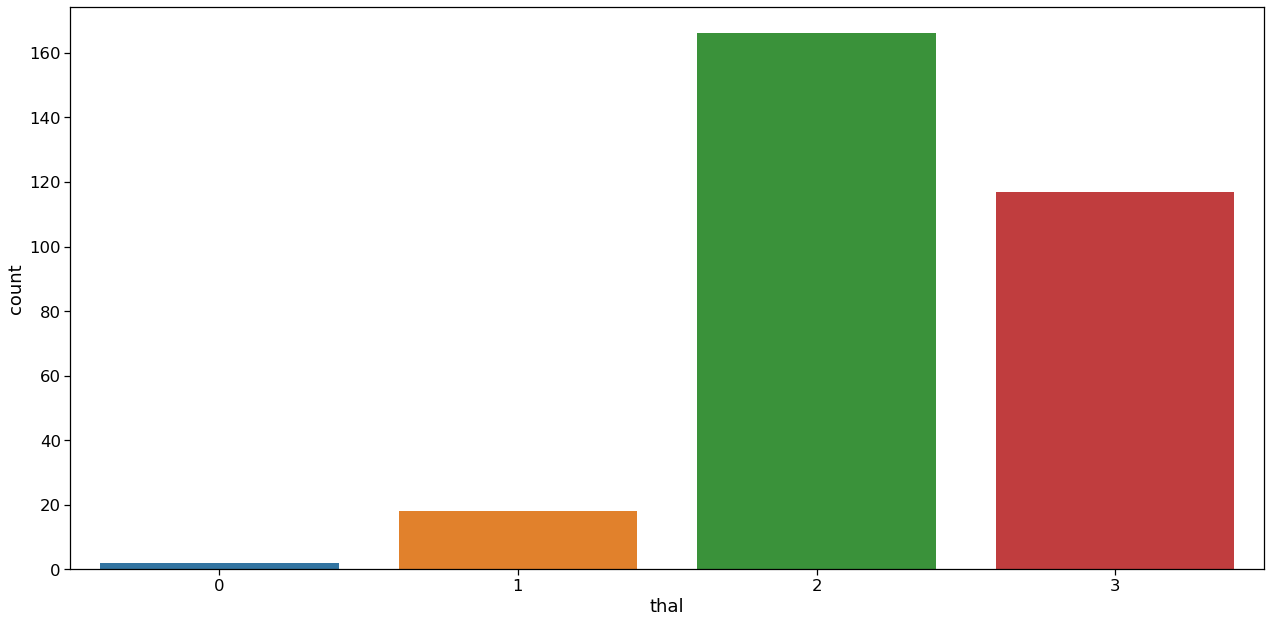

In [185]:
plt.figure(figsize =(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['thal'])
plt.tight_layout()

### Above you can see three types of Thal ,
1. 0: no thal
2. 1: mild 
3. 2: fixed defect
4. 3: reversible defect

/Users/vanshikathakur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


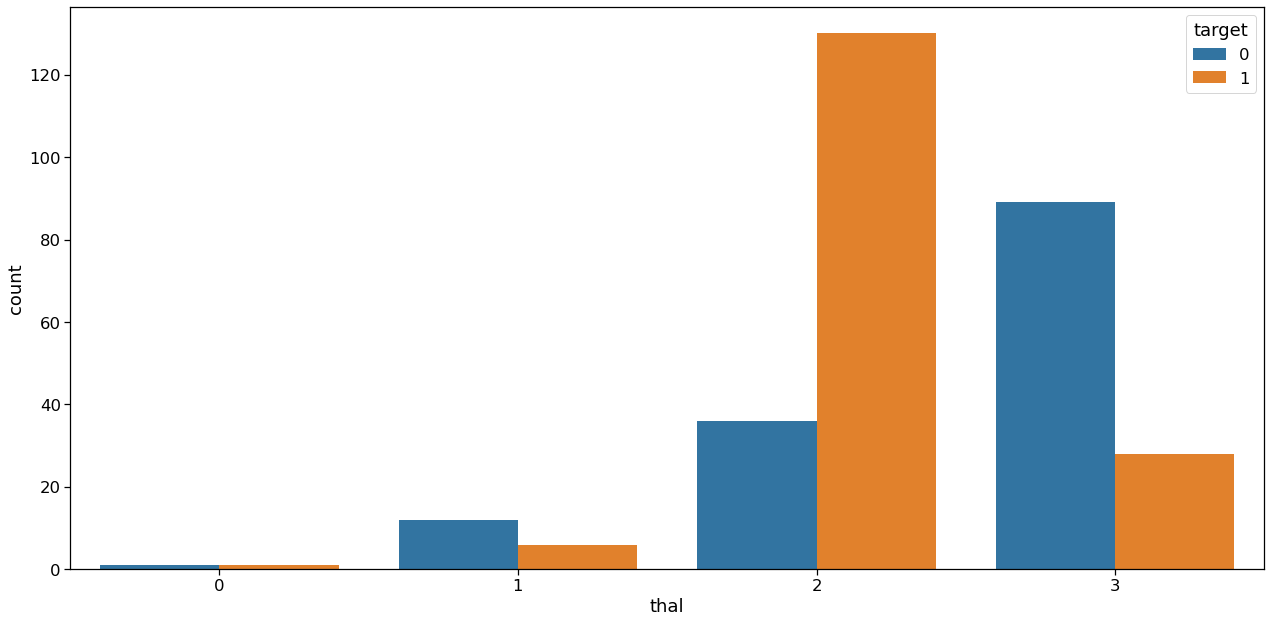

In [186]:
## lets analyze thal with target column to see how related is thal to causing heart disease
plt.figure(figsize = (18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['thal'],hue = df['target'])
plt.tight_layout()


## We can clearly gather from the above plot that people with type 2 thal are more prone to Heart disease.

# Target column Analysis


/Users/vanshikathakur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


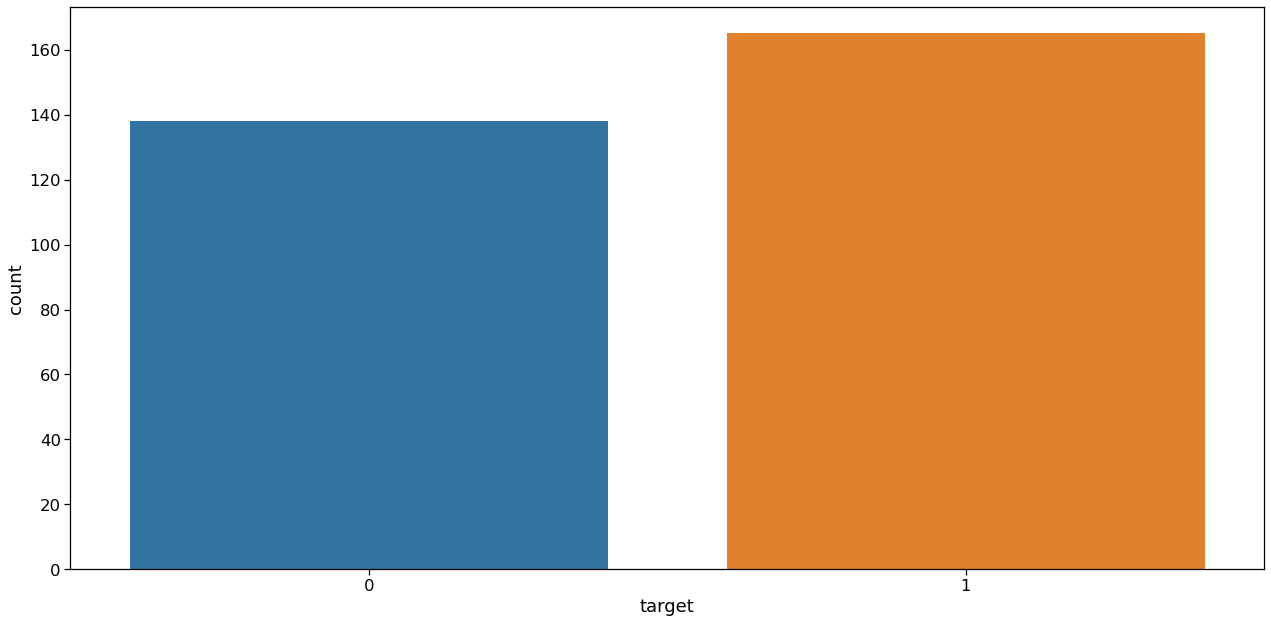

In [187]:
plt.figure(figsize = (18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['target'])
plt.tight_layout()

### The ratio between 1 and 0 is much less than 1.5 which indicates that target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

In [188]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Feature Engineering

In [189]:
categorical_val = []
continous_val = []
for column in df.columns:
    print("----------------------------------")
    print(f"{column} : {df[column].unique()}")
    if(len(df[column].unique())<=10):
        categorical_val.append(column)
    
    else:
        continous_val.append(column)
    

----------------------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
----------------------------------
sex : [1 0]
----------------------------------
cp : [3 2 1 0]
----------------------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
----------------------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 2

In [190]:
categorical_val.remove('target')
dfs = pd.get_dummies(df,columns = categorical_val)

In [191]:
dfs.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [192]:
sc = StandardScaler()

In [193]:
cols_to_scale = ["age","trestbps","chol","thalach","oldpeak"]
dfs[cols_to_scale] = sc.fit_transform(df[cols_to_scale])

In [194]:
dfs.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Modelling

In [195]:
## Splitting our dataset into test and train
X = dfs.drop('target',axis=1)
y = dfs.target

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [197]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
124,-1.694735,-2.148802,-0.913400,1.283627,-0.896862,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
72,-2.797624,-0.092738,-0.816773,2.289429,-0.896862,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
15,-0.481558,-0.663867,-0.526890,0.365287,0.483451,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
10,-0.040403,0.478391,-0.140381,0.452748,0.138373,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
163,-1.805024,0.364165,-1.377212,1.021244,-0.896862,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0


## We will work with the following
1. KNN
2. Random Forest Classifier
3. Catboost
4. XGboost

# KNN

In [198]:
## Inititalizing the model
knn = KNeighborsClassifier(n_neighbors = 10)

In [199]:
## Fitting train set to the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [200]:
## predicting test values by putting x_test in our trained model
y_pred1 = knn.predict(X_test)

In [201]:
## Then we will find the accuracy_score as target is a pretty balanced column
print(accuracy_score(y_test,y_pred1))

0.8571428571428571


In [211]:
## Hyperparameter Optimization
test_score = []
neighbors = range(1, 25)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))


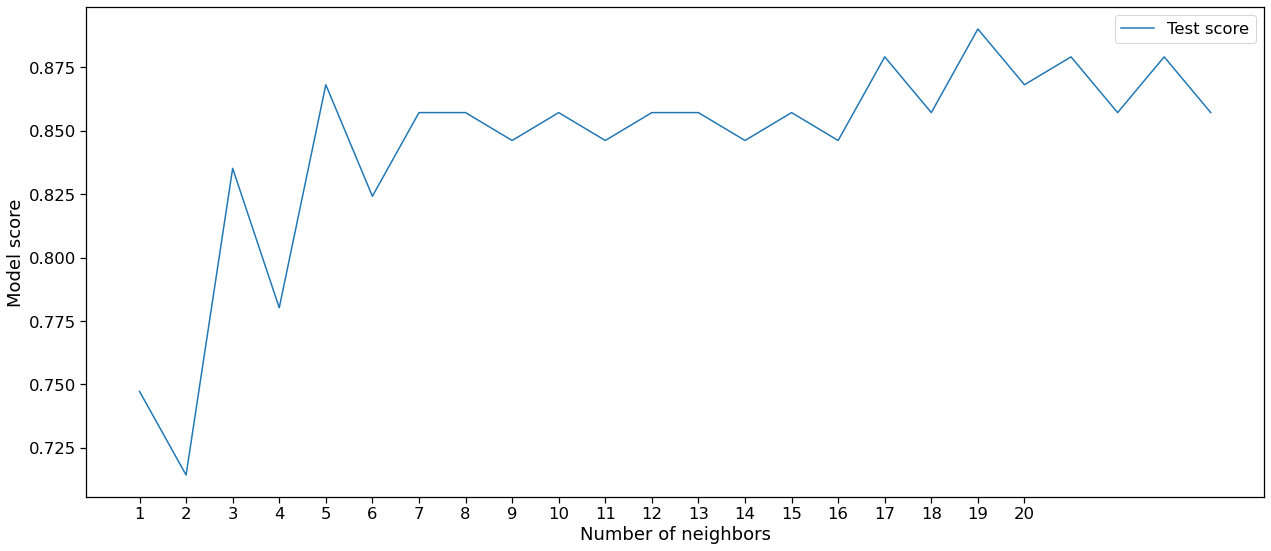

In [216]:
##plotting the result
plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

## We get highest accuracy at k=19

In [218]:
## Now we will again fit the model with new refined k value = 19
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.8901098901098901


## We have achieved an accuracy of 89% with KNN using hyperparameter tuning

# Random Forest Classifier

In [219]:
rfc = RandomForestClassifier()

In [220]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [221]:
y_pred2 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.8131868131868132


In [226]:
## Hyperparameter Optimization
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
params2 = {
    'n_estimators' : [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features' : ['auto','sqrt'],
    'max_depth'    : max_depth,
    'min_samples_split': [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'bootstrap'        : [True,False]
}

In [227]:
rfc = RandomForestClassifier(random_state = 42)

In [229]:
rfcs = RandomizedSearchCV(estimator=rfc, param_distributions=params2, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [230]:
rfcs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/vanshikathakur/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [231]:
rfcs.best_estimator_

RandomForestClassifier(max_depth=70, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=400, random_state=42)

In [232]:
y_pred3 = rfcs.predict(X_test)

In [233]:
print(accuracy_score(y_test,y_pred3))

0.8351648351648352


## Accuracy didn't improve much even after hyperparameter tuning .(final accuracy = 83%)

# XGboost Classifier

In [234]:
xgb = XGBClassifier(random_state =42)

In [235]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [236]:
y_pred4 = xgb.predict(X_test)

In [237]:
print((accuracy_score(y_test,y_pred4)))

0.8241758241758241


## Accuracy score of XGboost is 82%

# CatBoost Classifier

In [238]:
cat = CatBoostClassifier(random_state = 42)

In [239]:
cat.fit(X_train,y_train)


Learning rate set to 0.005312
0:	learn: 0.6894029	total: 66.5ms	remaining: 1m 6s
1:	learn: 0.6863888	total: 68.3ms	remaining: 34.1s
2:	learn: 0.6839654	total: 69.3ms	remaining: 23s
3:	learn: 0.6790263	total: 71ms	remaining: 17.7s
4:	learn: 0.6747228	total: 72.5ms	remaining: 14.4s
5:	learn: 0.6718471	total: 73.9ms	remaining: 12.2s
6:	learn: 0.6683912	total: 75.3ms	remaining: 10.7s
7:	learn: 0.6636855	total: 76.5ms	remaining: 9.49s
8:	learn: 0.6595984	total: 77.8ms	remaining: 8.56s
9:	learn: 0.6555097	total: 79.2ms	remaining: 7.84s
10:	learn: 0.6513984	total: 80.6ms	remaining: 7.24s
11:	learn: 0.6475292	total: 81.9ms	remaining: 6.74s
12:	learn: 0.6456136	total: 82.5ms	remaining: 6.26s
13:	learn: 0.6408923	total: 83.7ms	remaining: 5.89s
14:	learn: 0.6373982	total: 85ms	remaining: 5.58s
15:	learn: 0.6340551	total: 86.2ms	remaining: 5.3s
16:	learn: 0.6302115	total: 87.4ms	remaining: 5.05s
17:	learn: 0.6261477	total: 88.7ms	remaining: 4.84s
18:	learn: 0.6221295	total: 89.7ms	remaining: 4.63s

In [240]:
print(accuracy_score(y_test,cat.predict(X_test)))

0.8131868131868132


## Catboost gives an accuracy of 81%

# Conclusion

## knn gives highest accuracy of 89%